In [1]:
import torch

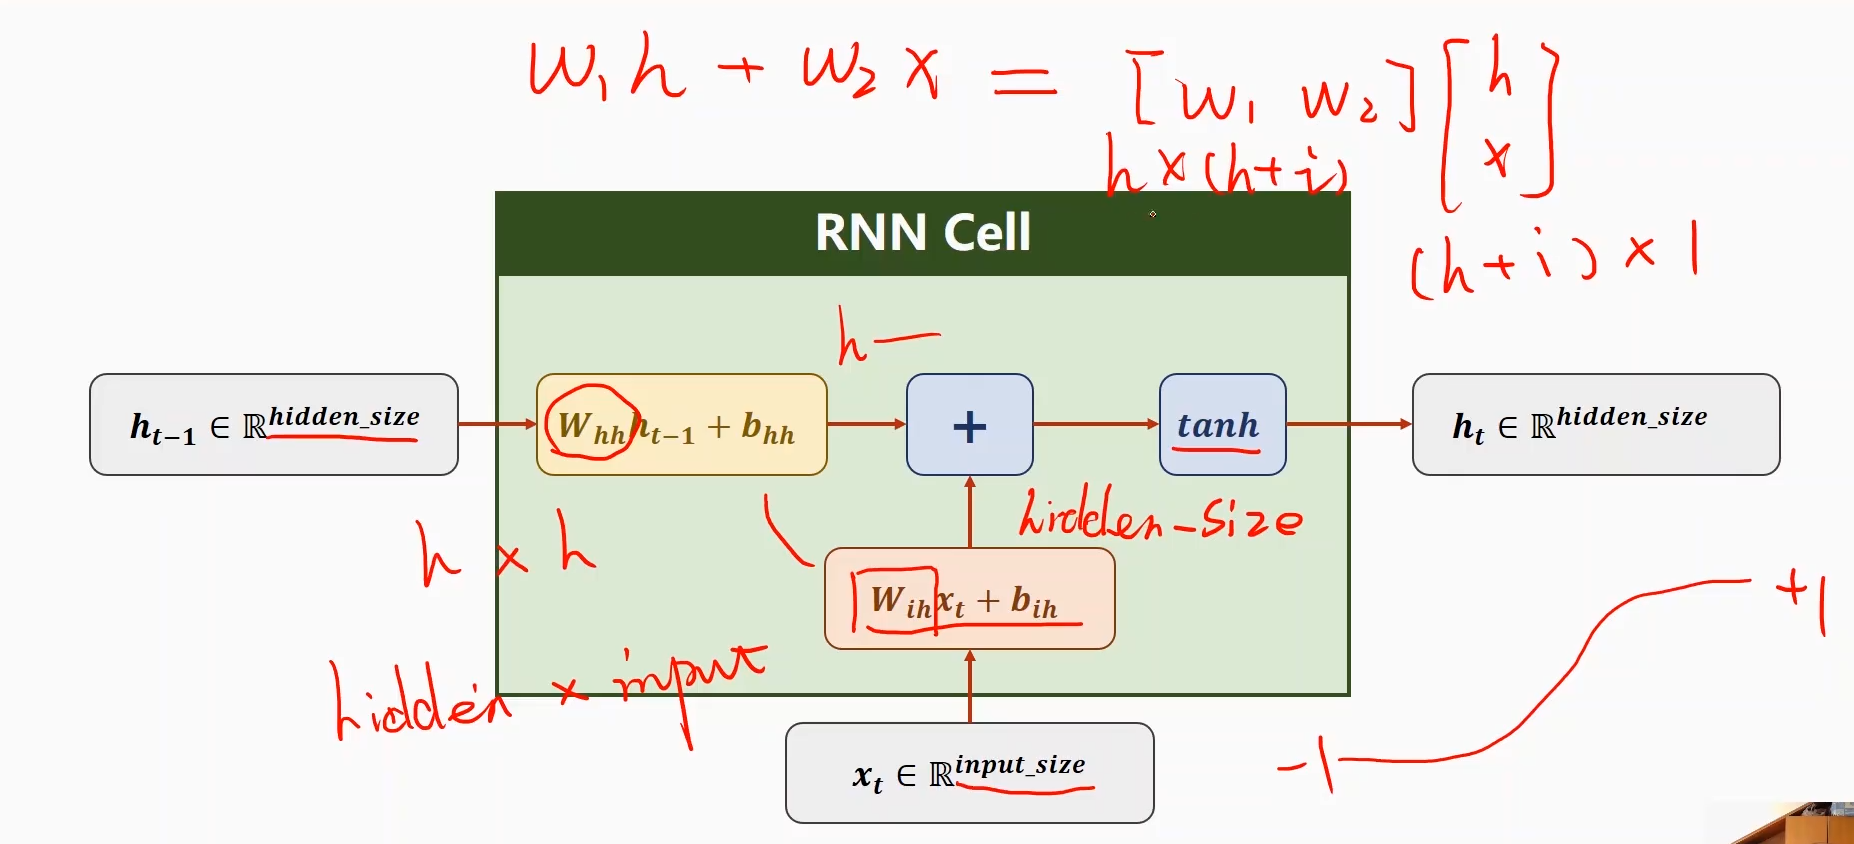

In [2]:
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2

In [3]:
cell = torch.nn.RNNCell(input_size = input_size, hidden_size = hidden_size)
cell

RNNCell(4, 2)

In [4]:
#(seq, batch, features)
dataset = torch.randn(seq_len, batch_size, input_size)
dataset

tensor([[[-0.6617, -0.1737, -1.8741, -1.7941]],

        [[-1.6326, -1.4979,  0.2136, -0.7871]],

        [[ 1.2075, -0.2318,  1.9220,  0.8840]]])

In [5]:
dataset.shape

torch.Size([3, 1, 4])

In [6]:
hidden = torch.zeros([batch_size, hidden_size])
hidden

tensor([[0., 0.]])

In [7]:
hidden.shape

torch.Size([1, 2])

In [8]:
for idx, input in enumerate(dataset):
    print('=' * 20, idx, '=' * 20)
    print('Input_size:', input.shape)
    hidden = cell(input, hidden)
    print('outputs_size:', hidden.shape)
    print(hidden)

==================== 0 ====================
Input_size: torch.Size([1, 4])
outputs_size: torch.Size([1, 2])
tensor([[-0.3074, -0.9513]], grad_fn=<TanhBackward0>)
==================== 1 ====================
Input_size: torch.Size([1, 4])
outputs_size: torch.Size([1, 2])
tensor([[-0.1795, -0.1838]], grad_fn=<TanhBackward0>)
==================== 2 ====================
Input_size: torch.Size([1, 4])
outputs_size: torch.Size([1, 2])
tensor([[0.8008, 0.7929]], grad_fn=<TanhBackward0>)


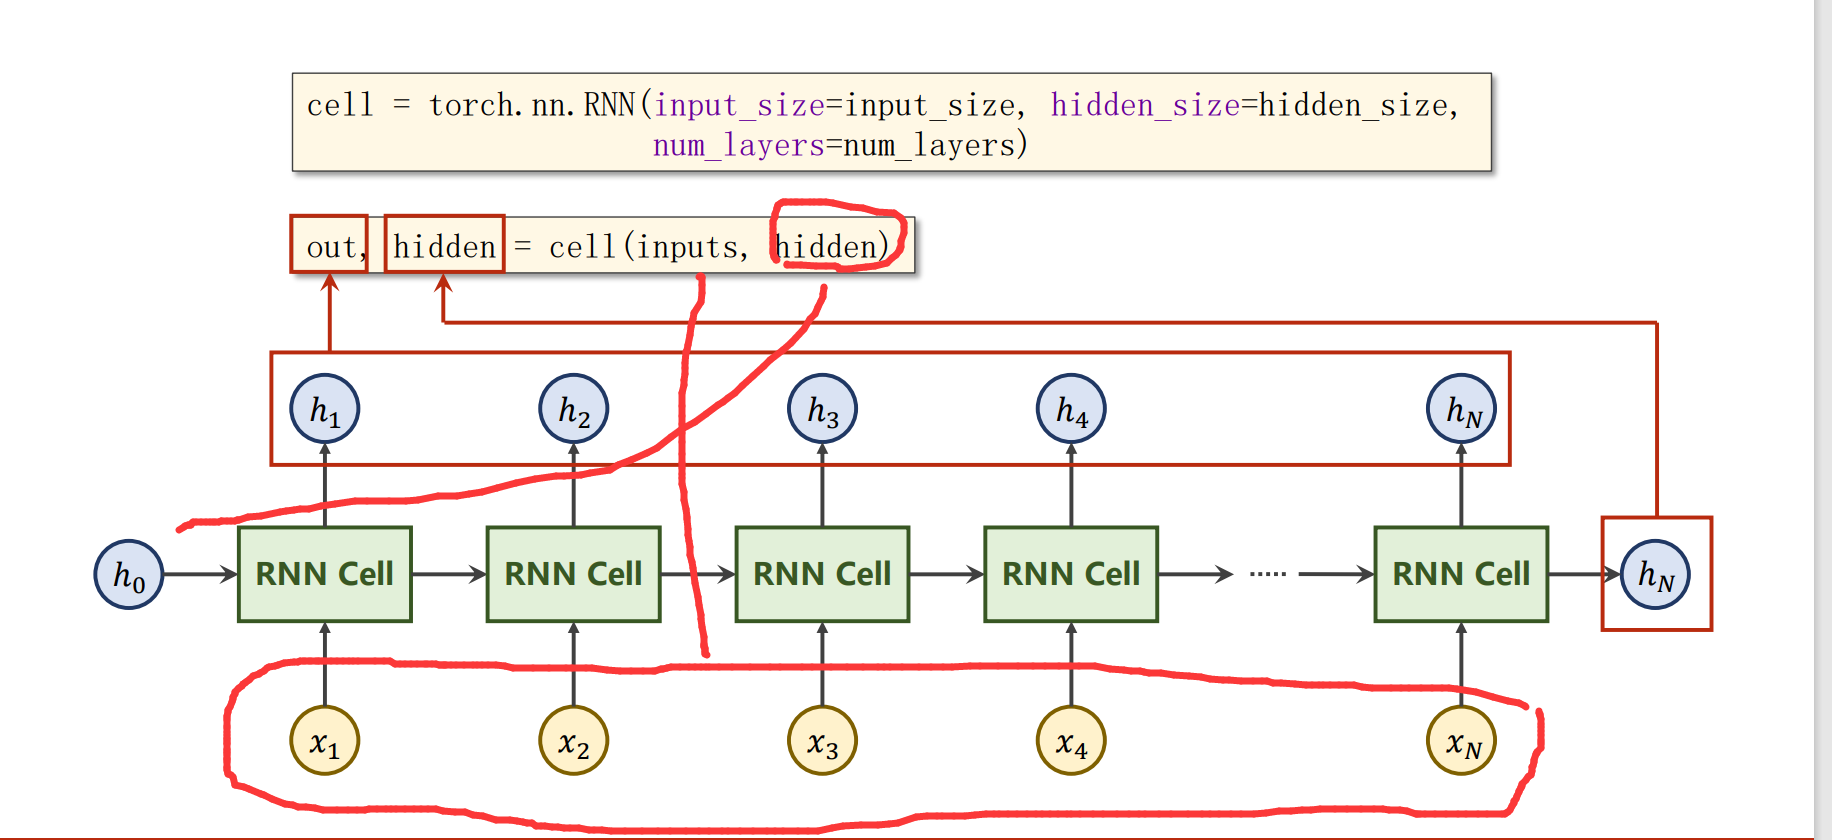

In [9]:
import torch

In [10]:
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2
num_layers = 1

In [13]:
inputs = torch.randn(seq_len, batch_size, input_size)
inputs, inputs.shape

(tensor([[[ 0.1457,  1.2690,  1.5222, -0.7142]],
 
         [[ 0.4280, -1.1490,  0.9808,  0.5433]],
 
         [[-1.3002, -0.2172, -1.5583,  0.2073]]]),
 torch.Size([3, 1, 4]))

In [14]:
hidden = torch.zeros(num_layers, batch_size, hidden_size)
hidden, hidden.shape

(tensor([[[0., 0.]]]), torch.Size([1, 1, 2]))

In [15]:
cell = torch.nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers)
cell

RNN(4, 2)

In [16]:
out, hidden = cell(inputs, hidden)

In [17]:
print('Output size:', out.shape)
print('Output:', out)
print('Hidden size: ', hidden.shape)
print('Hidden: ', hidden)

Output size: torch.Size([3, 1, 2])
Output: tensor([[[-0.7967, -0.4668]],

        [[-0.7499,  0.8778]],

        [[-0.0208, -0.8942]]], grad_fn=<StackBackward0>)
Hidden size:  torch.Size([1, 1, 2])
Hidden:  tensor([[[-0.0208, -0.8942]]], grad_fn=<StackBackward0>)


### 1. 3

In [18]:
import torch

In [19]:
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2
num_layers = 1

In [20]:
# # (seqLen, batchSize, inputSize) 要是batch_first = True的话，将batchsize和seqlen交换位置
cell = torch.nn.RNN(input_size = input_size, hidden_size = hidden_size,num_layers = num_layers, batch_first = True)

In [22]:
inputs = torch.randn(batch_size, seq_len, input_size)
inputs

tensor([[[-0.5512,  0.3578, -0.2194,  0.7078],
         [ 0.2623, -0.6438,  0.1319, -1.2240],
         [-0.6102,  0.1266,  0.7810, -0.0386]]])

In [23]:
hidden = torch.zeros(num_layers, batch_size, hidden_size)
hidden

tensor([[[0., 0.]]])

In [24]:
out, hidden = cell(inputs, hidden)

In [25]:
print('Output size:', out.shape)
print('Output:', out)
print('Hidden size: ', hidden.shape)
print('Hidden: ', hidden)

Output size: torch.Size([1, 3, 2])
Output: tensor([[[-0.4827, -0.3791],
         [ 0.2885,  0.2156],
         [-0.4955, -0.0331]]], grad_fn=<TransposeBackward1>)
Hidden size:  torch.Size([1, 1, 2])
Hidden:  tensor([[[-0.4955, -0.0331]]], grad_fn=<StackBackward0>)


### 作业：“hello”-> “ohlol”

#### 示意图

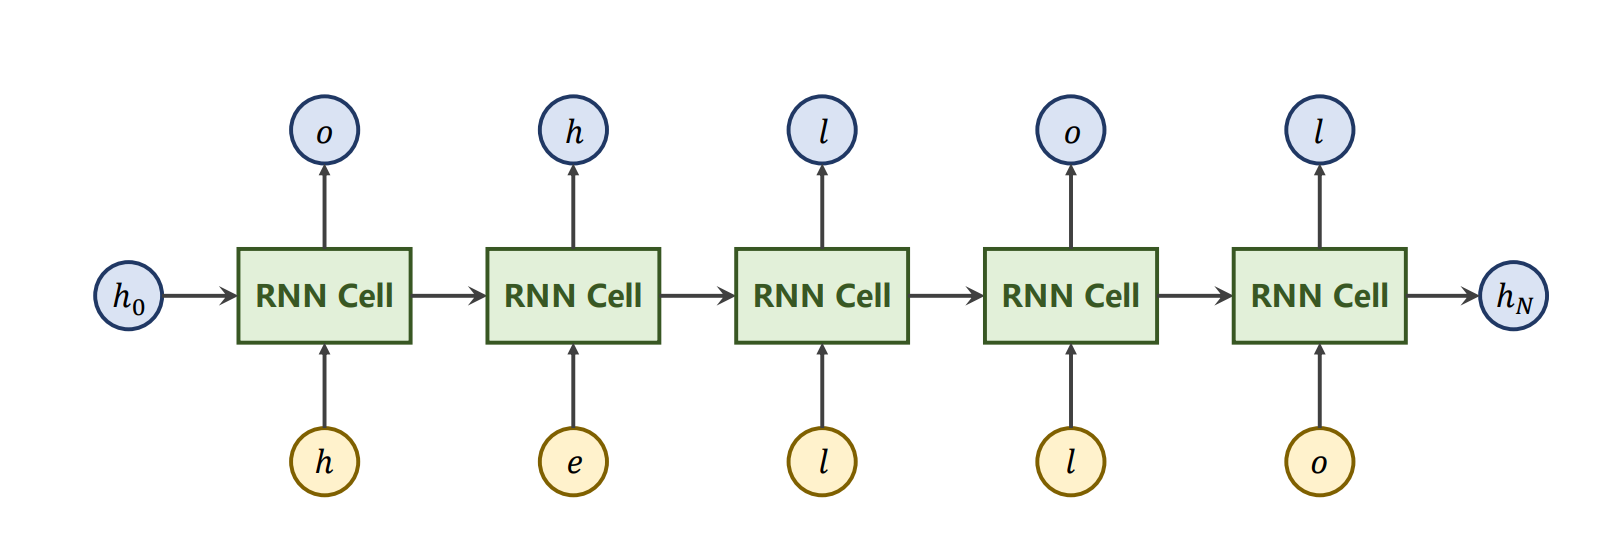

#### 将单词转为词向量

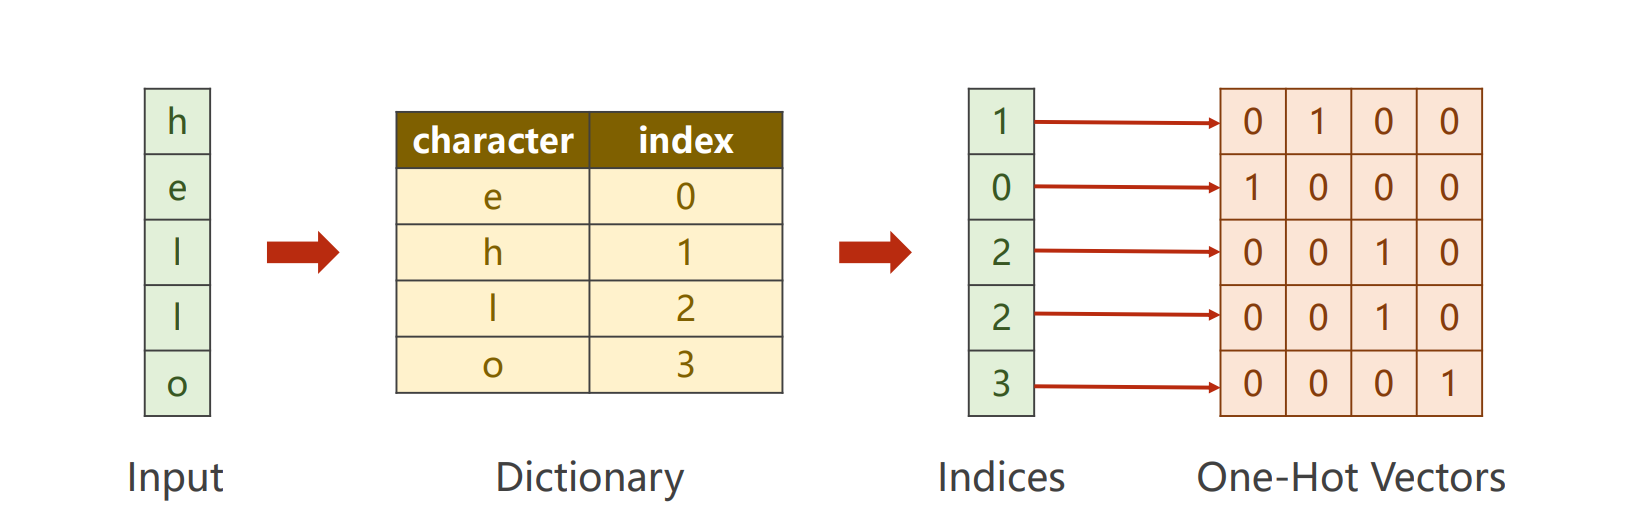

In [26]:
import torch

In [38]:
input_size = 4
hidden_size = 4
batch_size = 1

In [39]:
idx2char = ['e', 'h', 'l', 'o']
idx2char

['e', 'h', 'l', 'o']

In [40]:
x_data = [1, 0, 2, 2, 3]
y_data = [3, 1, 2, 3, 2]

In [41]:
one_hot_lookup = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
one_hot_lookup

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

In [42]:
x_one_hot = [one_hot_lookup[x] for x in x_data]
x_one_hot

[[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

In [57]:
inputs = torch.tensor(x_one_hot, dtype = torch.float32).reshape(-1, batch_size, input_size)
inputs

tensor([[[0., 1., 0., 0.]],

        [[1., 0., 0., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 0., 1.]]])

In [62]:
labels = torch.LongTensor(y_data).reshape(-1, 1)
labels

tensor([[3],
        [1],
        [2],
        [3],
        [2]])

In [63]:
# class RnnModel(torch.nn.Module):
#     def __init__(self, input_size, hidden_size, batch_size):
#         super(RnnModel, self).__init__()
#         # self.num_layers = num_layers
#         self.input_size = input_size
#         self.hideen_size = hidden_size
#         self.batch_size = batch_size
#         self.rnncell = torch.nn.RNNCell(input_size = self.input_size, hidden_size = self.hidden_size)
    
#     def forward(self, input, hidden):
#         hidden = self.rnncell(input, hidden)
#         return hidden
    
#     def init_hidden(self):
#         return torch.zeros(self.batch_size, self.hidden_size)
    
# net = RnnModel(input_size, hidden_size, batch_size)
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size):
        super(Model, self).__init__()
        # self.num_layers = num_layers
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnncell = torch.nn.RNNCell(input_size=self.input_size,hidden_size=self.hidden_size)
    def forward(self, input, hidden):
        hidden = self.rnncell(input, hidden)
        return hidden
    def init_hidden(self):
        return torch.zeros(self.batch_size, self.hidden_size)
net = Model(input_size, hidden_size, batch_size)
net

Model(
  (rnncell): RNNCell(4, 4)
)

In [64]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

In [65]:
for epoch in range(15):
    loss = 0
    optimizer.zero_grad()
    hidden = net.init_hidden()
    print('Predicted string: ', end='')
    for input, label in zip(inputs, labels):
        hidden = net(input, hidden)
        loss += criterion(hidden, label)
        _, idx = hidden.max(dim=1)
        print(idx2char[idx.item()], end='')
    loss.backward()
    optimizer.step()
    print(', Epoch [%d/15] loss=%.4f' % (epoch+1, loss.item()))

Predicted string: ooooo, Epoch [1/15] loss=6.7701
Predicted string: oolll, Epoch [2/15] loss=5.5541
Predicted string: ollll, Epoch [3/15] loss=5.2513
Predicted string: ollll, Epoch [4/15] loss=5.1171
Predicted string: ollll, Epoch [5/15] loss=4.9685
Predicted string: ollll, Epoch [6/15] loss=4.7167
Predicted string: ololl, Epoch [7/15] loss=4.3416
Predicted string: oholl, Epoch [8/15] loss=4.0745
Predicted string: oholl, Epoch [9/15] loss=4.0010
Predicted string: oholl, Epoch [10/15] loss=3.9275
Predicted string: oholl, Epoch [11/15] loss=3.7894
Predicted string: oholl, Epoch [12/15] loss=3.6342
Predicted string: oholl, Epoch [13/15] loss=3.5005
Predicted string: oholl, Epoch [14/15] loss=3.3931
Predicted string: oholl, Epoch [15/15] loss=3.3003


In [79]:
input_size = 4
hidden_size = 4
num_layers = 1
batch_size = 1
seq_len = 5

In [80]:
inputs = torch.tensor(x_one_hot, dtype = torch.float32).reshape(-1, batch_size, input_size)
inputs

tensor([[[0., 1., 0., 0.]],

        [[1., 0., 0., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 0., 1.]]])

In [84]:
labels = torch.LongTensor(y_data)
labels

tensor([3, 1, 2, 3, 2])

In [85]:
# 使用RNN
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size, num_layers=1):
        super(Model, self).__init__()
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size=self.input_size,hidden_size=self.hidden_size,num_layers=num_layers)
    def forward(self, input):
        hidden = torch.zeros(self.num_layers,self.batch_size,self.hidden_size)
        out, _ = self.rnn(input, hidden)
        return out.view(-1, self.hidden_size)
net = Model(input_size, hidden_size, batch_size, num_layers)
net

Model(
  (rnn): RNN(4, 4)
)

In [86]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
for epoch in range(15):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print('Predicted: ', ''.join([idx2char[x] for x in idx]), end='')
    print(', Epoch [%d/15] loss = %.3f' % (epoch + 1, loss.item()))

Predicted:  ollle, Epoch [1/15] loss = 1.356
Predicted:  ollll, Epoch [2/15] loss = 1.237
Predicted:  ollll, Epoch [3/15] loss = 1.135
Predicted:  ollll, Epoch [4/15] loss = 1.045
Predicted:  oholl, Epoch [5/15] loss = 0.977
Predicted:  oholl, Epoch [6/15] loss = 0.928
Predicted:  oholl, Epoch [7/15] loss = 0.881
Predicted:  oholl, Epoch [8/15] loss = 0.835
Predicted:  ohlll, Epoch [9/15] loss = 0.797
Predicted:  ohlll, Epoch [10/15] loss = 0.767
Predicted:  ohlll, Epoch [11/15] loss = 0.740
Predicted:  ohlll, Epoch [12/15] loss = 0.714
Predicted:  ohlol, Epoch [13/15] loss = 0.688
Predicted:  ohlol, Epoch [14/15] loss = 0.664
Predicted:  ohlol, Epoch [15/15] loss = 0.644


In [87]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
for epoch in range(15):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print('Predicted: ', ''.join([idx2char[x] for x in idx]), end='')
    print(', Epoch [%d/15] loss = %.3f' % (epoch + 1, loss.item()))

Predicted:  ohlol, Epoch [1/15] loss = 0.627
Predicted:  ohlol, Epoch [2/15] loss = 0.626
Predicted:  ohlol, Epoch [3/15] loss = 0.625
Predicted:  ohlol, Epoch [4/15] loss = 0.625
Predicted:  ohlol, Epoch [5/15] loss = 0.624
Predicted:  ohlol, Epoch [6/15] loss = 0.623
Predicted:  ohlol, Epoch [7/15] loss = 0.623
Predicted:  ohlol, Epoch [8/15] loss = 0.622
Predicted:  ohlol, Epoch [9/15] loss = 0.622
Predicted:  ohlol, Epoch [10/15] loss = 0.621
Predicted:  ohlol, Epoch [11/15] loss = 0.620
Predicted:  ohlol, Epoch [12/15] loss = 0.620
Predicted:  ohlol, Epoch [13/15] loss = 0.619
Predicted:  ohlol, Epoch [14/15] loss = 0.618
Predicted:  ohlol, Epoch [15/15] loss = 0.618


### Embedding

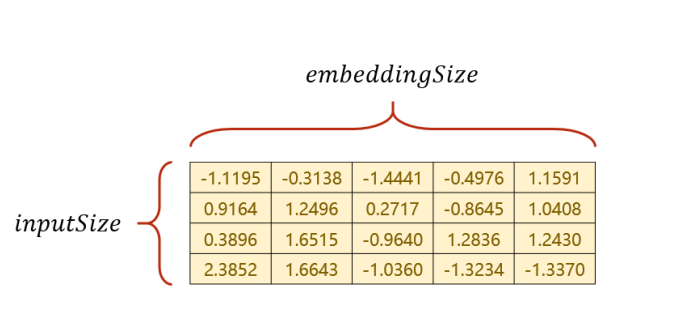

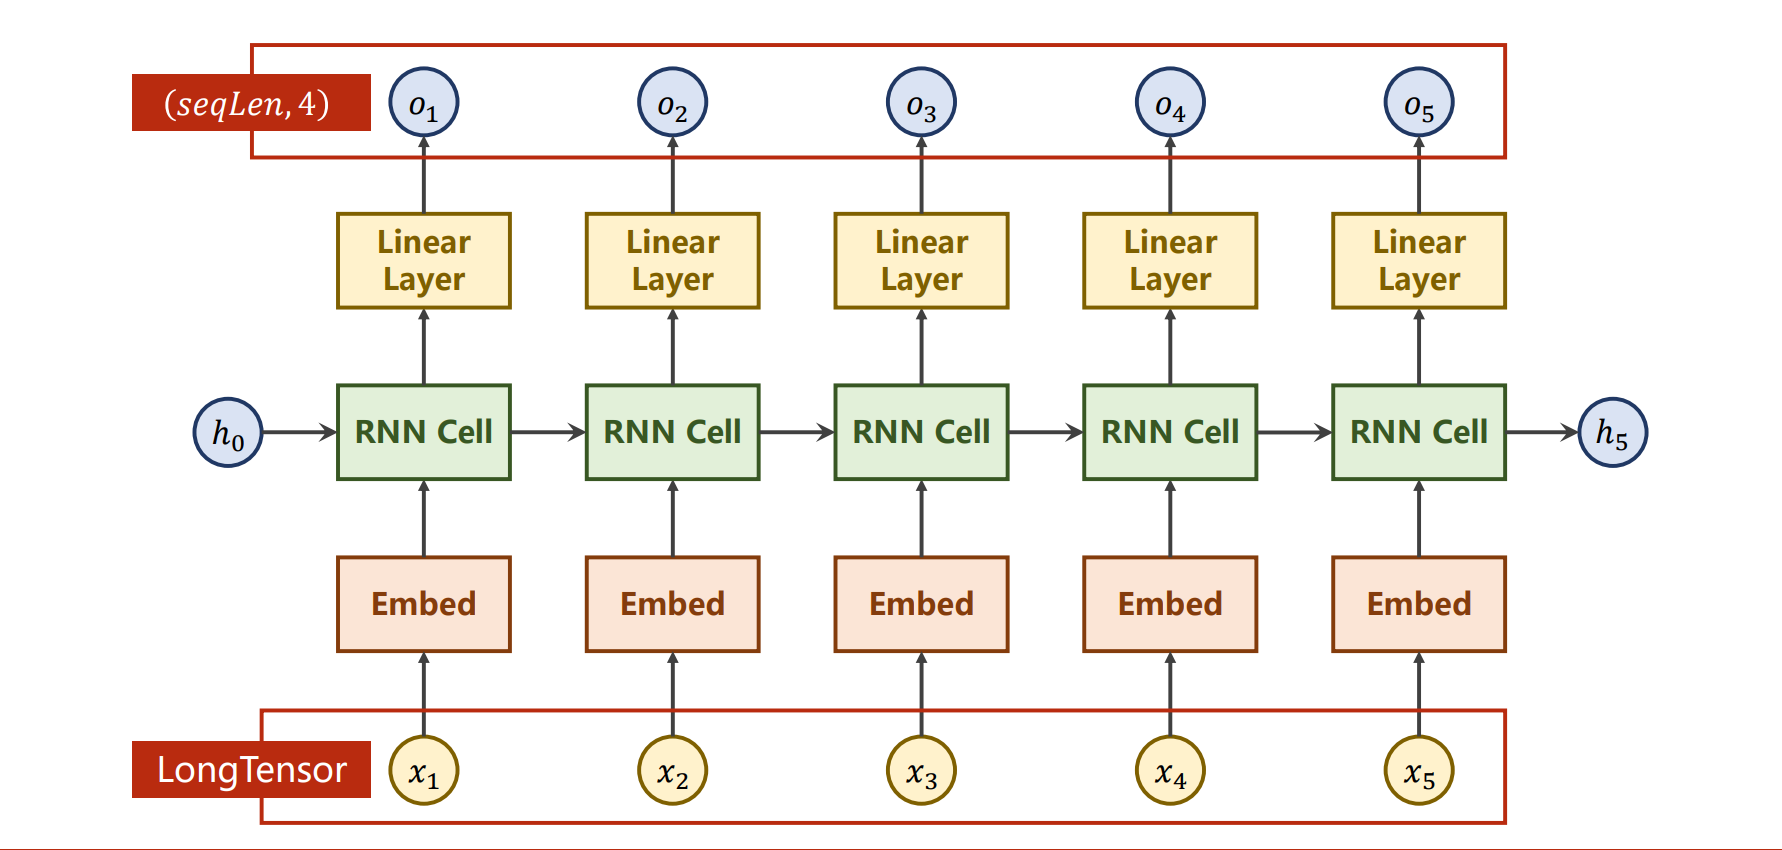

In [88]:
num_class = 4
input_size = 4
hidden_size = 8
embedding_size = 10
num_layers = 2
batch_size = 1
seq_len = 5

In [89]:
idx2char = ['e', 'h', 'l', 'o']
x_data = [[1, 0, 2, 2, 3]] # (batch, seq_len)
y_data = [3, 1, 2, 3, 2] # (batch * seq_len)
inputs = torch.LongTensor(x_data)
labels = torch.LongTensor(y_data)

In [90]:
inputs

tensor([[1, 0, 2, 2, 3]])

In [91]:
labels

tensor([3, 1, 2, 3, 2])

In [92]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = torch.nn.Embedding(input_size, embedding_size)
        self.rnn = torch.nn.RNN(input_size=embedding_size,hidden_size=hidden_size,num_layers=num_layers,
        batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_class)
    def forward(self, x):
        hidden = torch.zeros(num_layers, x.size(0), hidden_size)
        x = self.emb(x) # (batch, seqLen, embeddingSize)
        x, _ = self.rnn(x, hidden)
        x = self.fc(x)
        return x.view(-1, num_class)

In [93]:
net = Model()
net

Model(
  (emb): Embedding(4, 10)
  (rnn): RNN(10, 8, num_layers=2, batch_first=True)
  (fc): Linear(in_features=8, out_features=4, bias=True)
)

In [94]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

In [95]:
for epoch in range(15):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print('Predicted: ', ''.join([idx2char[x] for x in idx]), end='')
    print(', Epoch [%d/15] loss = %.3f' % (epoch + 1, loss.item()))

Predicted:  eeeee, Epoch [1/15] loss = 1.556
Predicted:  lllll, Epoch [2/15] loss = 1.242
Predicted:  lllll, Epoch [3/15] loss = 1.079
Predicted:  lllol, Epoch [4/15] loss = 0.898
Predicted:  ohlol, Epoch [5/15] loss = 0.689
Predicted:  ohlol, Epoch [6/15] loss = 0.512
Predicted:  ohlol, Epoch [7/15] loss = 0.366
Predicted:  ohlol, Epoch [8/15] loss = 0.253
Predicted:  ohlol, Epoch [9/15] loss = 0.171
Predicted:  ohlol, Epoch [10/15] loss = 0.116
Predicted:  ohlol, Epoch [11/15] loss = 0.079
Predicted:  ohlol, Epoch [12/15] loss = 0.055
Predicted:  ohlol, Epoch [13/15] loss = 0.038
Predicted:  ohlol, Epoch [14/15] loss = 0.027
Predicted:  ohlol, Epoch [15/15] loss = 0.020
